In [1]:
from __future__ import division
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [18]:
def logistic(input):
    out = np.exp(input)/(1+ np.exp(input))
    return out

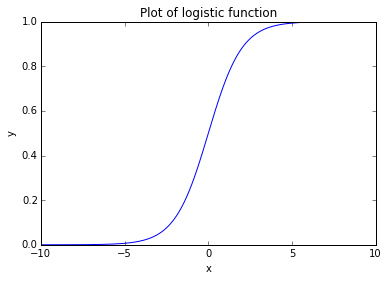

In [3]:
x = np.linspace(-10,10,num=1000)
plt.plot(x, logistic(x))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of logistic function')

Before continuing, let's load our dataset

In [33]:
data = np.loadtxt('admission_dataset.txt')
data_matrix = data[:,[0,1]]
admission_labels = data[:,2]

In [34]:
def logistic_insample(X, y, w):
    N, num_feat = X.shape
    E = 0
    for n in range(N):
        E = E + np.log(1+ np.exp(-y[n]*np.dot((np.transpose(w)), X[n,:])))
    return E/N



For the sake of checking our logistic log likelihood function logistic_insample, let's simulate a starting value of $w$ and evaluate

In [26]:
N, num_feat = data_matrix.shape
#Append a column of ones to the data matrix
onevec = np.ones((N,1))
X = np.concatenate((onevec, data_matrix), axis = 1)
# Let's turn the admission labels into +/- 1 labels
y = (admission_labels-0.5)*2

np.random.seed(0)
w = 0.1*np.random.randn(num_feat + 1)
L = logistic_insample(X, y, w)
print(L)

0.940931285174


0.940931285174

In [17]:
def logistic_gradient(X, y, w):
    N, _ = X.shape
    g = 0*w
    
    for n in range(N):
        g = g + (-y[n]*X[n,:]*logistic(-y[n]*np.dot((np.transpose(w)),X[n,:])))
    return g/N

Again, for checking the gradient function, let's evaluate it on our simulated $w$ value

In [21]:
G = logistic_gradient(X,y,w)
print(G)

[ 0.3902137   1.29587263  2.22260581]


In [7]:
np.random.seed(0)
from sklearn import datasets

def logistic_func(theta, x):
    return float(1) / (1 + math.e**(-x.dot(theta)))
def log_gradient(theta, x, y):
    first_calc = logistic_func(theta, x) - np.squeeze(y)
    final_calc = first_calc.T.dot(x)
    return final_calc
def cost_func(theta, x, y):
    log_func_v = logistic_func(theta,x)
    y = np.squeeze(y)
    step1 = y * np.log(log_func_v)
    step2 = (1-y) * np.log(1 - log_func_v)

    final = -step1 - step2
    return np.mean(final)
def grad_desc(theta_values, X, y, lr=8e-7, converge_change=1e-10, lr_change = 1.4):
    #normalize
    with np.errstate(divide='ignore', invalid='ignore'):
        X = np.true_divide((X - np.mean(X, axis=0)),np.std(X, axis=0))
        X[X == np.inf] = 0
        X = np.nan_to_num(X)
    #setup cost iter
    cost_iter = [] #E_in
    cost = cost_func(theta_values, X, y)
    cost_iter.append([0, cost]) #E_in
    change_cost = 1 
    i = 1 #t 
    convergence = 0
    while (change_cost > converge_change): #converges when there is no change in (E - E_t)
        old_cost = cost #E = E_t
        theta_values = theta_values - (lr * log_gradient(theta_values, X, y))
        #w = w - (lr*g)
        cost = cost_func(theta_values, X, y) #E_t
        cost_iter.append([i, cost]) #append E_t to E_in
        change_cost = old_cost - cost
        
         #E - E_t
        #should consider changing learning rate here so if E - E_t > 0 then increase the learning rate
        #otherwise slow it down
        if old_cost > cost:
            lr *=lr_change
        else:
            lr*=0.9
        #if change_cost < converge_change:
            #convergence = 1
        g = log_gradient((theta_values), X, y)
        #if np.linalg.norm(g) < 0:
            #convergence = 1
        """elif i > max_i:
            convergence = 1"""
        i +=1
        #t = t + 1
    print lr, converge_change
    return theta_values, np.array(cost_iter)
def pred_values(theta, X, hard=True):
    #normalize
    with np.errstate(divide='ignore', invalid='ignore'):
        X = np.true_divide((X - np.mean(X, axis=0)),np.std(X, axis=0))
        X[X == np.inf] = 0
        X = np.nan_to_num(X)
    
    pred_prob = logistic_func(theta, X)
    pred_value = np.where(pred_prob >= .5, 1, 0)
    if hard:
        return pred_value
    return pred_value

#for i in range (0,10):
    #w, _ = grad_desc(theta_values, X, y, lr=i*1e-7, converge_change=1e-10, max_i = 1e5)
    #pred_label = 
#This code is based http://stackoverflow.com/questions/26248654/numpy-return-0-with-divide-by-zero[1]

import numpy as np
import matplotlib.pyplot as plt
import math

def cent(data):
    """Rescale features of data to have properties of a standard normal distribution with zero mean and variance of 1."""
    
    np.random.seed(0) #to remove randomisation effects
    
    mean_cols = np.mean(data, axis=0)
    var_cols = np.sqrt(np.var(data, axis = 0))
    r, _ = data.shape
    mean_matrix = np.array([mean_cols]*r)
    var_matrix = np.array([var_cols]*r)
    #The following part is based on [1]
    with np.errstate(divide='ignore', invalid='ignore'):
        cent_data = np.true_divide((data - mean_matrix),var_matrix)
        cent_data[cent_data == np.inf] = 0
        cent_data = np.nan_to_num(cent_data)
    
    return cent_data


print 'wine data'
X = np.loadtxt('exam/redwinedata/redwine_train.txt')
y = np.loadtxt('exam/redwinedata/redwine_trainlabels.txt')
#print y
test = np.loadtxt('exam/redwinedata/redwine_test.txt')
testlabels = np.loadtxt('exam/redwinedata/redwine_testlabels.txt')



wine data


In [54]:
import timeit
start = timeit.default_timer()

np.random.seed(0)
from sklearn import datasets

def logistic(input):
    out = np.exp(input)/(1+ np.exp(input))
    return out
def logistic_insample(X, y, w):
    N, num_feat = X.shape
    E = 0
    for n in range(N):
        E = E + (1/N)*np.log(1/logistic(y[n]*np.dot(w,X[n,:])))
    return E
def logistic_gradient(X, y, w):
    N, _ = X.shape
    g = 0*w

    for n in range(N):
        g = g + ((-1/N)*y[n]*X[n,:])*logistic(-y[n]*np.dot(w,X[n,:]))
    return g
def grad_desc(w, X, y, lr=8e-3, converge_change=1e-3, lr_change = 1.4):
    #normalize
    with np.errstate(divide='ignore', invalid='ignore'):
        X = np.true_divide((X - np.mean(X, axis=0)),np.std(X, axis=0))
        X[X == np.inf] = 0
        X = np.nan_to_num(X)
    #setup cost iter
    E_in = [] 
    E_t = logistic_insample(X, y, w)
    E_in.append(E_t) 
    change_E = 1 
    t = 1 
    convergence = 0
    while (change_E > converge_change): #converges when there is no change in (E - E_t)
        E = E_t
        w = w - (lr * logistic_gradient(X,y,w))
        #w = w - (lr*g)
        E_t = logistic_insample(X, y, w) 
        E_in.append(E_t) #append E_t to E_in
        change_E = E - E_t
        
         #E - E_t
        #should consider changing learning rate here so if E - E_t > 0 then increase the learning rate
        #otherwise slow it down
        if E > E_t:
            lr *=lr_change
        else:
            lr*=0.9
        #if change_cost < converge_change:
            #convergence = 1
        #if np.linalg.norm(g) < 0:
            #convergence = 1
        """elif i > max_i:
            convergence = 1"""
        t +=1
        #t = t + 1
    print lr, converge_change
    return w, np.array(E_in)
    print w.shape
def pred_values(w, X, hard=True):
    #normalize
    with np.errstate(divide='ignore', invalid='ignore'):
        X = np.true_divide((X - np.mean(X, axis=0)),np.std(X, axis=0))
        X[X == np.inf] = 0
        X = np.nan_to_num(X)
    pred_values = []
    N, _ = X.shape
    for n in range(N):
        pred_prob = logistic(w.T.dot(X[n,:]) )
        pred_value = np.where(pred_prob >= .5, 1, 0)
        if hard:
            pred_values.append(pred_value)
    return pred_values

r, d = data_matrix.shape

betas = np.zeros(d)

fitted_values, E_in = grad_desc(betas, data_matrix, y, lr=1, converge_change=1e-1, lr_change=1.1)
print fitted_values

1.1 0.1
[-0.00944149 -0.00011593]


[ 0.3902137   1.29587263  2.22260581]

Having working functions for logistic log likelihood and logistic gradient, let's implement gradient descent

In [61]:
import timeit
start = timeit.default_timer()

np.random.seed(0)
from sklearn import datasets

def logistic(input):
    out = np.exp(input)/(1+ np.exp(input))
    return out
def logistic_insample(X, y, w):
    N, num_feat = X.shape
    E = 0
    for n in range(N):
        E = E + (1/N)*np.log(1/logistic(y[n]*np.dot(w,X[n,:])))
    return E
def logistic_gradient(X, y, w):
    N, _ = X.shape
    g = 0*w

    for n in range(N):
        g = g + ((-1/N)*y[n]*X[n,:])*logistic(-y[n]*np.dot(w,X[n,:]))
    return g
def grad_desc(w, X, y, lr=8e-7, converge_change=1e-10, lr_change = 1.4):
    #normalize
    with np.errstate(divide='ignore', invalid='ignore'):
        X = np.true_divide((X - np.mean(X, axis=0)),np.std(X, axis=0))
        X[X == np.inf] = 0
        X = np.nan_to_num(X)
    #setup cost iter
    E_in = [] 
    E_t = logistic_insample(X, y, w)
    E_in.append(E_t) 
    change_E = 1 
    t = 1 
    convergence = 0
    while (change_E > converge_change): #converges when there is no change in (E - E_t)
        E = E_t
        w = w - (lr * logistic_gradient(X,y,w))
        #w = w - (lr*g)
        E_t = logistic_insample(X, y, w) 
        E_in.append(E_t) #append E_t to E_in
        change_E = E - E_t
        
         #E - E_t
        #should consider changing learning rate here so if E - E_t > 0 then increase the learning rate
        #otherwise slow it down
        if E > E_t:
            lr *=lr_change
        else:
            lr*=0.9
        #if change_cost < converge_change:
            #convergence = 1
    
        #if np.linalg.norm(g) < 0:
            #convergence = 1
        """elif i > max_i:
            convergence = 1"""
        t +=1
        #t = t + 1
    print lr, converge_change
    return w, np.array(E_in)
    print w.shape


#for i in range (0,10):
    #w, _ = grad_desc(theta_values, X, y, lr=i*1e-7, converge_change=1e-10, max_i = 1e5)
    #pred_label = 
#This code is based http://stackoverflow.com/questions/26248654/numpy-return-0-with-divide-by-zero[1]

r, d = data_matrix.shape

betas = np.zeros(d)

fitted_values, E_in = grad_desc(betas, data_matrix, y, lr=20, converge_change=1e-2, lr_change=0.1)
print fitted_values

18.0 0.01
[-0.1888299  -0.00231859]


In [29]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression()
logreg.fit(data_matrix, y)
w = logreg.coef_
print w
print data_matrix.shape
#[ 0.11733929  0.20826236]

[[ 0.11733929  0.20826236]]
(400, 2)


Problem: Can you make the code faster?

Let's evaluate the classification accuracy on the training set

What is going on? Let's try with a weight matrix $w = [-4.9494, 0.7547, 0.2691]$ obtained by waiting much longer

My classification accuracy is not great -- is this just not working?

In [3]:
def logistic(input):  
    out = np.exp(input)/(1+np.exp(input))
    return out
def logistic_insample(X, y, w):
    N, num_feat = X.shape
    E = 0 #sum in the loop
    for n in range(N):
        E = E + (1/N)*np.log(1/logistic(y[n]*np.dot(w,X[n,:]))) #feeding it vectors
    return E
def logistic_gradient(X, y, w):
    N, _ = X.shape
    g = 0*w
    
    for n in range(N):
        g = g + ((-1/N)*y[n]*X[n,:])*logistic(-y[n]*np.dot(w,X[n,:]))
    return g

In [28]:
def log_pred(Xorig, w):
    #X is a dxN data matrix of input variables
    num_pts,num_feat =Xorig.shape
    onevec=np.ones((num_pts,1))
    X=np.concatenate((onevec,Xorig),axis=1)
    N, _ =X.shape
    P=np.zeros(N)
    for n in range(N):
        arg=np.exp(np.dot(w,X[n,:]))
        prob_i=arg/(1+arg)
        P[n]=prob_i
        
    Pthresh=np.round(P)   #0/1 class labels
    pred_classes=(Pthresh-0.5)*2
    return P, pred_classes

In [ ]:
# Set direction to move and take a step       
        
        ##############################################################
        g=np.array(g)
        w_new = w-learningrate*g

In [32]:
y = (admission_labels-0.5)*2
print admission_labels
print pred_classes

[ 0.  1.  1.  1.  0.  1.  1.  0.  1.  0.  0.  0.  1.  0.  1.  0.  0.  0.
  0.  1.  0.  1.  0.  0.  1.  1.  1.  1.  1.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  1.  1.  0.  1.  1.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  1.
  0.  1.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.
  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  1.  1.  0.  0.  0.  0.
  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.
  0.  0.  0.  0.  1.  0.  1.  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  1.  0.  0.
  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  1.
  0.  0.  0.  1.  1.  0.  1.  1.  0.  1.  0.  0.  0.  0.  0.  0.  1.  1.
  0.  1.  0.  1.  0.  0.  1.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.
  1.  0.  1.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0